In [1]:
from utils.network import Network
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


def sine_wave(graph: bool = False):
    ''' Create data as sine-wave to test for
        non-linearity

        Returns: NP.array sine wave
    '''
    sample_size = 100
    x_min = 0
    x_max = 2 * np.pi

    # Generate the x values
    x_values = np.linspace(x_min, x_max, sample_size)
    # Compute the y values using a non-linear function (e.g., sine)
    y_values = np.sin(x_values)
    # Combine x and y into a nested list of tuples
    dataset = np.array(list(zip(x_values, y_values)))
    if graph:
        plt.plot(dataset[:, 0], dataset[:, 1])
        plt.title('Input')
        plt.show()
    return dataset

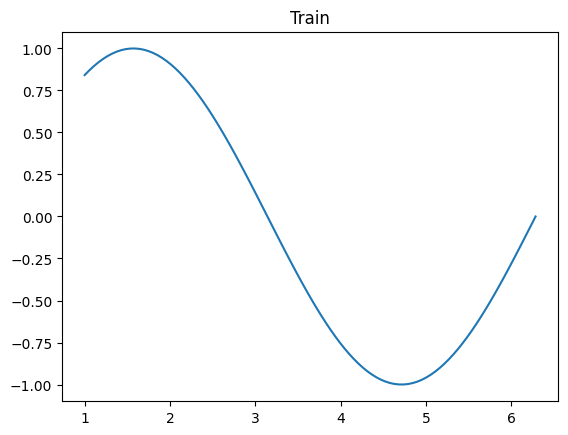

In [2]:
# Parameters
num_points = 100
test_size = 0.3
random_state = 42  # For reproducibility

# Generate dataset
x = np.linspace(1, 2*np.pi, num_points)
y = np.sin(x)

# # Define the range for x values
# x = np.linspace(-10, 10, 400)  # 400 points from -10 to 10

# # Define the nonlinear function, e.g., y = x^2
# y = x**2
plt.plot(x, y)
plt.title('Train')
plt.show()

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=test_size, random_state=random_state)

training_data = np.array(list(zip(x, y)))

In [3]:
example_network = Network(dataset=training_data)
example_network.init_network(layers=2)
print(example_network.layers.values())
print('')
print(example_network.layers[0].neurons)

dict_values([<utils.layers.Layer object at 0x1049c1610>, <utils.layers.Layer object at 0x1250eaa50>])

{0: <utils.neurons.Neuron object at 0x1250f82d0>, 1: <utils.neurons.Neuron object at 0x1250f8150>, 2: <utils.neurons.Neuron object at 0x1250f95d0>, 3: <utils.neurons.Neuron object at 0x1250f88d0>, 4: <utils.neurons.Neuron object at 0x1250fa250>, 5: <utils.neurons.Neuron object at 0x1250fa550>, 6: <utils.neurons.Neuron object at 0x1250fa710>, 7: <utils.neurons.Neuron object at 0x1250fa0d0>, 8: <utils.neurons.Neuron object at 0x1250fa490>, 9: <utils.neurons.Neuron object at 0x1250fa090>, 10: <utils.neurons.Neuron object at 0x1250fa190>, 11: <utils.neurons.Neuron object at 0x1250f9410>, 12: <utils.neurons.Neuron object at 0x1250fb2d0>, 13: <utils.neurons.Neuron object at 0x1250fb3d0>, 14: <utils.neurons.Neuron object at 0x1250fb610>, 15: <utils.neurons.Neuron object at 0x1250fb490>, 16: <utils.neurons.Neuron object at 0x1250fae90>, 17: <utils.neurons.Neuron object at 0x1250f9f50>, 18: <u

In [4]:
n1 = example_network.layers[0].neurons[1]
print(f'weights {n1.weights}')
print('')
print(f'signal {n1.signal}')
print(f'state {n1.state}')

weights [[0.56577198 0.53512238]
 [0.35624272 0.97981428]
 [0.9654403  0.19976702]]

signal 0.2430183737550553
state 1.1730097854136028


In [5]:
# print(n1.iterate())


delta_signal = n1.feed_forward()
res = n1.derivative()
neuron_loss_grad = (delta_signal - n1.inputs_y)
d_output_d_weights = res * n1.inputs_y.T
gradient = neuron_loss_grad * d_output_d_weights

In [6]:
print(gradient)

[-0.05288784 -0.05294902]


In [7]:
print(n1.weights)
print('')
n1.weights -= n1.learning_rate * gradient
print(n1.weights)

[[0.56577198 0.53512238]
 [0.35624272 0.97981428]
 [0.9654403  0.19976702]]

[[0.59003904 0.55941751]
 [0.38050978 1.00410941]
 [0.98970736 0.22406215]]


In [8]:
n1.iterate()

0.9925067853564131